<a href="https://colab.research.google.com/github/luisfer2405/PI_HDT_07_FEB_2023/blob/main/EDA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_parquet('/content/drive/MyDrive/df_final.parquet')
df.head()


,userId,score,timestamp,id,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,plataforma,duration_int,duration_type
0,1,1.0,1425941529,as680,s680,tv show,the english civil war,None,robert whelan,None,None,2019,13+,1 season,"documentary, special interest",a nation divided. it was a time of great bitte...,a,1,season
1,583,4.5,1112982383,as680,s680,tv show,the english civil war,None,robert whelan,None,None,2019,13+,1 season,"documentary, special interest",a nation divided. it was a time of great bitte...,a,1,season
2,765,5.0,889677014,as680,s680,tv show,the english civil war,None,robert whelan,None,None,2019,13+,1 season,"documentary, special interest",a nation divided. it was a time of great bitte...,a,1,season
3,2116,3.0,836264839,as680,s680,tv show,the english civil war,None,robert whelan,None,None,2019,13+,1 season,"documentary, special interest",a nation divided. it was a time of great bitte...,a,1,season
4,2143,3.0,1435067487,as680,s680,tv show,the english civil war,None,robert whelan,None,None,2019,13+,1 season,"documentary, special interest",a nation divided. it was a time of great bitte...,a,1,season


In [ ]:
df.shape


(11024289, 19)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 11024289 entries, 0 to 11024288
Data columns (total 19 columns):
 #   Column         Dtype  
---  ------         -----  
 0   userId         int64  
 1   score          float64
 2   timestamp      int64  
 3   id             object 
 4   show_id        object 
 5   type           object 
 6   title          object 
 7   director       object 
 8   cast           object 
 9   country        object 
 10  date_added     object 
 11  release_year   int64  
 12  rating         object 
 13  duration       object 
 14  listed_in      object 
 15  description    object 
 16  plataforma     object 
 17  duration_int   object 
 18  duration_type  object 
dtypes: float64(1), int64(3), object(15)
memory usage: 1.6+ GB


In [ ]:
df.describe()


,userId,score,timestamp,release_year
count,1.102429e+07,1.102429e+07,1.102429e+07,1.102429e+07
mean,8.997251e+04,3.533455e+00,1.172542e+09,2.010819e+03
std,8.686601e+04,1.059692e+00,2.056774e+08,1.538663e+01
min,1.000000e+00,5.000000e-01,7.896520e+08,1.920000e+03
25%,2.855800e+04,3.000000e+00,9.901593e+08,2.010000e+03
50%,5.684300e+04,3.500000e+00,1.153610e+09,2.016000e+03
75%,1.168670e+05,4.000000e+00,1.360470e+09,2.019000e+03
max,2.708960e+05,5.000000e+00,1.501827e+09,2.021000e+03


In [ ]:
df.isnull().sum()


userId                 0
score                  0
timestamp              0
id                     0
show_id                0
type                   0
title                  0
director         3960615
cast             2550859
country          5510080
date_added       4577546
release_year           0
rating                 0
duration          231117
listed_in              0
description         1815
plataforma             0
duration_int      231117
duration_type     231117
dtype: int64

In [ ]:
df = df.drop(['show_id', 'description','duration'], axis=1)

Histograma de la puntuación de la película:

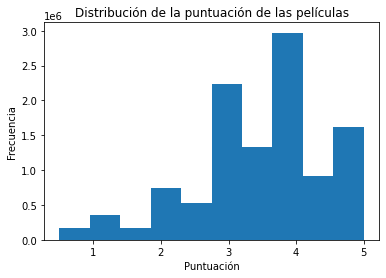

In [ ]:
plt.hist(df['score'], bins=10)
plt.xlabel('Puntuación')
plt.ylabel('Frecuencia')
plt.title('Distribución de la puntuación de las películas')
plt.show()


Diagrama de dispersión de la puntuación de la película y el tiempo que tarda el usuario en verla:

In [ ]:
plt.scatter(df['score'], df['timestamp'])
plt.xlabel('Puntuación')
plt.ylabel('Tiempo (segundos)')
plt.title('Relación entre la puntuación de la película y el tiempo que tarda el usuario en verla')
plt.show()


NameError: ignored

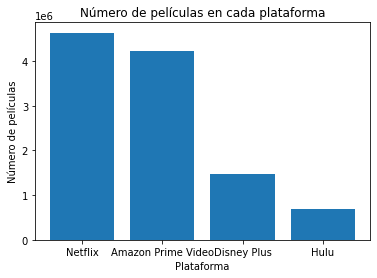

In [ ]:
plt.bar(['Netflix', 'Amazon Prime Video', 'Disney Plus', 'Hulu'], df['plataforma'].value_counts().values)
plt.xlabel('Plataforma')
plt.ylabel('Número de películas')
plt.title('Número de películas en cada plataforma')
plt.show()


In [ ]:
plt.pie(data['type'].value_counts().values, labels=['Películas', 'Programas de televisión'])
plt.title('Proporción de películas versus programas de televisión')
plt.show()


In [ ]:
genre_rating = data.groupby('listed_in')['rating'].mean().unstack()
sns.heatmap(genre_rating, cmap='YlGnBu')
plt.title('Correlación entre el rating de la película y el género')
plt.show()
